# Machine Learning Models 
### RICE - 4-mers - Cold Model - WORD2VEC

In [1]:
# Import Libs
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

pd.set_option('display.max_column', None)

In [2]:
# Read preprocessed dataset
df = pd.read_excel('rice_word2vec_4mer_dataset.xlsx')
df

,circName,stress,tissue,chr,start,end,strand,start_anno,wc_4mer_1,wc_4mer_2,wc_4mer_3,wc_4mer_4,wc_4mer_5,wc_4mer_6,wc_4mer_7,wc_4mer_8,wc_4mer_9,wc_4mer_10,wc_4mer_11,wc_4mer_12,wc_4mer_13,wc_4mer_14,wc_4mer_15,wc_4mer_16,wc_4mer_17,wc_4mer_18,wc_4mer_19,wc_4mer_20,wc_4mer_21,wc_4mer_22,wc_4mer_23,wc_4mer_24,wc_4mer_25,wc_4mer_26,wc_4mer_27,wc_4mer_28,wc_4mer_29,wc_4mer_30,wc_4mer_31,wc_4mer_32,wc_4mer_33,wc_4mer_34,wc_4mer_35,wc_4mer_36,wc_4mer_37,wc_4mer_38,wc_4mer_39,wc_4mer_40,wc_4mer_41,wc_4mer_42,wc_4mer_43,wc_4mer_44,wc_4mer_45,wc_4mer_46,wc_4mer_47,wc_4mer_48,wc_4mer_49,wc_4mer_50,wc_4mer_51,wc_4mer_52,wc_4mer_53,wc_4mer_54,wc_4mer_55,wc_4mer_56,wc_4mer_57,wc_4mer_58,wc_4mer_59,wc_4mer_60,wc_4mer_61,wc_4mer_62,wc_4mer_63,wc_4mer_64,wc_4mer_65,wc_4mer_66,wc_4mer_67,wc_4mer_68,wc_4mer_69,wc_4mer_70,wc_4mer_71,wc_4mer_72,wc_4mer_73,wc_4mer_74,wc_4mer_75,wc_4mer_76,wc_4mer_77,wc_4mer_78,wc_4mer_79,wc_4mer_80,wc_4mer_81,wc_4mer_82,wc_4mer_83,wc_4mer_84,wc_4mer_85,wc_4mer_86,wc_4mer_87,wc_4mer_88,wc_4mer_89,wc_4mer_90,wc_4mer_91,wc_4mer_92,wc_4mer_93,wc_4mer_94,wc_4mer_95,wc_4mer_96,wc_4mer_97,wc_4mer_98,wc_4mer_99,wc_4mer_100,wc_4mer_101,wc_4mer_102,wc_4mer_103,wc_4mer_104,wc_4mer_105,wc_4mer_106,wc_4mer_107,wc_4mer_108,wc_4mer_109,wc_4mer_110,wc_4mer_111,wc_4mer_112,wc_4mer_113,wc_4mer_114,wc_4mer_115,wc_4mer_116,wc_4mer_117,wc_4mer_118,wc_4mer_119,wc_4mer_120,wc_4mer_121,wc_4mer_122,wc_4mer_123,wc_4mer_124,wc_4mer_125,wc_4mer_126,wc_4mer_127,wc_4mer_128,wc_4mer_129,wc_4mer_130,wc_4mer_131,wc_4mer_132,wc_4mer_133,wc_4mer_134,wc_4mer_135,wc_4mer_136,wc_4mer_137,wc_4mer_138,wc_4mer_139,wc_4mer_140,wc_4mer_141,wc_4mer_142,wc_4mer_143,wc_4mer_144,wc_4mer_145,wc_4mer_146,wc_4mer_147,wc_4mer_148,wc_4mer_149,wc_4mer_150,wc_4mer_151,wc_4mer_152,wc_4mer_153,wc_4mer_154,wc_4mer_155,wc_4mer_156,wc_4mer_157,wc_4mer_158,wc_4mer_159,wc_4mer_160,wc_4mer_161,wc_4mer_162,wc_4mer_163,wc_4mer_164,wc_4mer_165,wc_4mer_166,wc_4mer_167,wc_4mer_168,wc_4mer_169,wc_4mer_170,wc_4mer_171,wc_4mer_172,wc_4mer_173,wc_4mer_174,wc_4mer_175,wc_4mer_176,wc_4mer_177,wc_4mer_178,wc_4mer_179,wc_4mer_180,wc_4mer_181,wc_4mer_182,wc_4mer_183,wc_4mer_184,wc_4mer_185,wc_4mer_186,wc_4mer_187,wc_4mer_188,wc_4mer_189,wc_4mer_190,wc_4mer_191,wc_4mer_192,wc_4mer_193,wc_4mer_194,wc_4mer_195,wc_4mer_196,wc_4mer_197,wc_4mer_198,wc_4mer_199,wc_4mer_200,wc_4mer_201,wc_4mer_202,wc_4mer_203,wc_4mer_204,wc_4mer_205,wc_4mer_206,wc_4mer_207,wc_4mer_208,wc_4mer_209,wc_4mer_210,wc_4mer_211,wc_4mer_212,wc_4mer_213,wc_4mer_214,wc_4mer_215,wc_4mer_216,wc_4mer_217,wc_4mer_218,wc_4mer_219,wc_4mer_220,wc_4mer_221,wc_4mer_222,wc_4mer_223,wc_4mer_224,wc_4mer_225,wc_4mer_226,wc_4mer_227,wc_4mer_228,wc_4mer_229,wc_4mer_230,wc_4mer_231,wc_4mer_232,wc_4mer_233,wc_4mer_234,wc_4mer_235,wc_4mer_236,wc_4mer_237,wc_4mer_238,wc_4mer_239,wc_4mer_240,wc_4mer_241,wc_4mer_242,wc_4mer_243,wc_4mer_244,wc_4mer_245,wc_4mer_246,wc_4mer_247,wc_4mer_248,wc_4mer_249,wc_4mer_250,wc_4mer_251,wc_4mer_252,wc_4mer_253,wc_4mer_254,wc_4mer_255,wc_4mer_256
0,osa-circ1-OS01T0723400,-,multipleTissue,1,30167620,30167771,+,"exon,CDS",-9.631496,-0.634460,-3.264506,-10.142410,-0.693955,22.418541,7.751618,15.179257,-12.151490,-20.963579,-12.817549,13.397994,17.140964,-20.646895,13.770729,-20.158993,19.089966,-5.410151,7.091797,9.966236,16.552398,10.671199,14.827449,0.256889,8.262174,-10.096396,-9.350854,-14.087773,14.365371,15.353111,3.866351,13.010766,16.359126,2.374459,-9.569086,25.880517,8.007311,7.955359,-4.304443,-10.228346,-10.060778,-3.393460,-12.155098,-6.570499,-15.362787,19.305631,-2.738950,3.328907,13.249510,10.935397,-1.602724,-26.804423,10.499418,10.488329,2.335484,-3.201496,1.255173,5.395788,-14.896552,-7.433471,1.267927,-19.044378,-1.780889,11.466656,-11.765424,-7.857456,1.698612,-1.718879,10.396450,-5.531118,1.846748,-11.545142,-9.100081,-11.291909,16.456888,26.777565,-7.694368,-4.410710,5.974340,15.594477,17.183902,-5.493664,0.400668,7.653764,12.161695,5.316246,-13.203126,3.275380,8.637285,15.878424,-6.60803

#### Feature Engineering


In [3]:
# Replace control to 0 and stress to 1 label
df_cold = df.query('stress == "-" or stress == "cold"').replace('-', 0).replace('cold', 1)
df_cold.head()

,circName,stress,tissue,chr,start,end,strand,start_anno,wc_4mer_1,wc_4mer_2,wc_4mer_3,wc_4mer_4,wc_4mer_5,wc_4mer_6,wc_4mer_7,wc_4mer_8,wc_4mer_9,wc_4mer_10,wc_4mer_11,wc_4mer_12,wc_4mer_13,wc_4mer_14,wc_4mer_15,wc_4mer_16,wc_4mer_17,wc_4mer_18,wc_4mer_19,wc_4mer_20,wc_4mer_21,wc_4mer_22,wc_4mer_23,wc_4mer_24,wc_4mer_25,wc_4mer_26,wc_4mer_27,wc_4mer_28,wc_4mer_29,wc_4mer_30,wc_4mer_31,wc_4mer_32,wc_4mer_33,wc_4mer_34,wc_4mer_35,wc_4mer_36,wc_4mer_37,wc_4mer_38,wc_4mer_39,wc_4mer_40,wc_4mer_41,wc_4mer_42,wc_4mer_43,wc_4mer_44,wc_4mer_45,wc_4mer_46,wc_4mer_47,wc_4mer_48,wc_4mer_49,wc_4mer_50,wc_4mer_51,wc_4mer_52,wc_4mer_53,wc_4mer_54,wc_4mer_55,wc_4mer_56,wc_4mer_57,wc_4mer_58,wc_4mer_59,wc_4mer_60,wc_4mer_61,wc_4mer_62,wc_4mer_63,wc_4mer_64,wc_4mer_65,wc_4mer_66,wc_4mer_67,wc_4mer_68,wc_4mer_69,wc_4mer_70,wc_4mer_71,wc_4mer_72,wc_4mer_73,wc_4mer_74,wc_4mer_75,wc_4mer_76,wc_4mer_77,wc_4mer_78,wc_4mer_79,wc_4mer_80,wc_4mer_81,wc_4mer_82,wc_4mer_83,wc_4mer_84,wc_4mer_85,wc_4mer_86,wc_4mer_87,wc_4mer_88,wc_4mer_89,wc_4mer_90,wc_4mer_91,wc_4mer_92,wc_4mer_93,wc_4mer_94,wc_4mer_95,wc_4mer_96,wc_4mer_97,wc_4mer_98,wc_4mer_99,wc_4mer_100,wc_4mer_101,wc_4mer_102,wc_4mer_103,wc_4mer_104,wc_4mer_105,wc_4mer_106,wc_4mer_107,wc_4mer_108,wc_4mer_109,wc_4mer_110,wc_4mer_111,wc_4mer_112,wc_4mer_113,wc_4mer_114,wc_4mer_115,wc_4mer_116,wc_4mer_117,wc_4mer_118,wc_4mer_119,wc_4mer_120,wc_4mer_121,wc_4mer_122,wc_4mer_123,wc_4mer_124,wc_4mer_125,wc_4mer_126,wc_4mer_127,wc_4mer_128,wc_4mer_129,wc_4mer_130,wc_4mer_131,wc_4mer_132,wc_4mer_133,wc_4mer_134,wc_4mer_135,wc_4mer_136,wc_4mer_137,wc_4mer_138,wc_4mer_139,wc_4mer_140,wc_4mer_141,wc_4mer_142,wc_4mer_143,wc_4mer_144,wc_4mer_145,wc_4mer_146,wc_4mer_147,wc_4mer_148,wc_4mer_149,wc_4mer_150,wc_4mer_151,wc_4mer_152,wc_4mer_153,wc_4mer_154,wc_4mer_155,wc_4mer_156,wc_4mer_157,wc_4mer_158,wc_4mer_159,wc_4mer_160,wc_4mer_161,wc_4mer_162,wc_4mer_163,wc_4mer_164,wc_4mer_165,wc_4mer_166,wc_4mer_167,wc_4mer_168,wc_4mer_169,wc_4mer_170,wc_4mer_171,wc_4mer_172,wc_4mer_173,wc_4mer_174,wc_4mer_175,wc_4mer_176,wc_4mer_177,wc_4mer_178,wc_4mer_179,wc_4mer_180,wc_4mer_181,wc_4mer_182,wc_4mer_183,wc_4mer_184,wc_4mer_185,wc_4mer_186,wc_4mer_187,wc_4mer_188,wc_4mer_189,wc_4mer_190,wc_4mer_191,wc_4mer_192,wc_4mer_193,wc_4mer_194,wc_4mer_195,wc_4mer_196,wc_4mer_197,wc_4mer_198,wc_4mer_199,wc_4mer_200,wc_4mer_201,wc_4mer_202,wc_4mer_203,wc_4mer_204,wc_4mer_205,wc_4mer_206,wc_4mer_207,wc_4mer_208,wc_4mer_209,wc_4mer_210,wc_4mer_211,wc_4mer_212,wc_4mer_213,wc_4mer_214,wc_4mer_215,wc_4mer_216,wc_4mer_217,wc_4mer_218,wc_4mer_219,wc_4mer_220,wc_4mer_221,wc_4mer_222,wc_4mer_223,wc_4mer_224,wc_4mer_225,wc_4mer_226,wc_4mer_227,wc_4mer_228,wc_4mer_229,wc_4mer_230,wc_4mer_231,wc_4mer_232,wc_4mer_233,wc_4mer_234,wc_4mer_235,wc_4mer_236,wc_4mer_237,wc_4mer_238,wc_4mer_239,wc_4mer_240,wc_4mer_241,wc_4mer_242,wc_4mer_243,wc_4mer_244,wc_4mer_245,wc_4mer_246,wc_4mer_247,wc_4mer_248,wc_4mer_249,wc_4mer_250,wc_4mer_251,wc_4mer_252,wc_4mer_253,wc_4mer_254,wc_4mer_255,wc_4mer_256
0,osa-circ1-OS01T0723400,0,multipleTissue,1,30167620,30167771,+,"exon,CDS",-9.631496,-0.634460,-3.264506,-10.142410,-0.693955,22.418541,7.751618,15.179257,-12.151490,-20.963579,-12.817549,13.397994,17.140964,-20.646895,13.770729,-20.158993,19.089966,-5.410151,7.091797,9.966236,16.552398,10.671199,14.827449,0.256889,8.262174,-10.096396,-9.350854,-14.087773,14.365371,15.353111,3.866351,13.010766,16.359126,2.374459,-9.569086,25.880517,8.007311,7.955359,-4.304443,-10.228346,-10.060778,-3.393460,-12.155098,-6.570499,-15.362787,19.305631,-2.738950,3.328907,13.249510,10.935397,-1.602724,-26.804423,10.499418,10.488329,2.335484,-3.201496,1.255173,5.395788,-14.896552,-7.433471,1.267927,-19.044378,-1.780889,11.466656,-11.765424,-7.857456,1.698612,-1.718879,10.396450,-5.531118,1.846748,-11.545142,-9.100081,-11.291909,16.456888,26.777565,-7.694368,-4.410710,5.974340,15.594477,17.183902,-5.493664,0.400668,7.653764,12.161695,5.316246,-13.203126,3.275380,8.637285,15.878424,-6.60803

In [4]:
# Removing columns that will not be used
df_cold = df_cold.drop(['circName', 'tissue', 'chr', 'start', 'end', 'strand', 'start_anno'], axis=1)
df_cold.head()

,stress,wc_4mer_1,wc_4mer_2,wc_4mer_3,wc_4mer_4,wc_4mer_5,wc_4mer_6,wc_4mer_7,wc_4mer_8,wc_4mer_9,wc_4mer_10,wc_4mer_11,wc_4mer_12,wc_4mer_13,wc_4mer_14,wc_4mer_15,wc_4mer_16,wc_4mer_17,wc_4mer_18,wc_4mer_19,wc_4mer_20,wc_4mer_21,wc_4mer_22,wc_4mer_23,wc_4mer_24,wc_4mer_25,wc_4mer_26,wc_4mer_27,wc_4mer_28,wc_4mer_29,wc_4mer_30,wc_4mer_31,wc_4mer_32,wc_4mer_33,wc_4mer_34,wc_4mer_35,wc_4mer_36,wc_4mer_37,wc_4mer_38,wc_4mer_39,wc_4mer_40,wc_4mer_41,wc_4mer_42,wc_4mer_43,wc_4mer_44,wc_4mer_45,wc_4mer_46,wc_4mer_47,wc_4mer_48,wc_4mer_49,wc_4mer_50,wc_4mer_51,wc_4mer_52,wc_4mer_53,wc_4mer_54,wc_4mer_55,wc_4mer_56,wc_4mer_57,wc_4mer_58,wc_4mer_59,wc_4mer_60,wc_4mer_61,wc_4mer_62,wc_4mer_63,wc_4mer_64,wc_4mer_65,wc_4mer_66,wc_4mer_67,wc_4mer_68,wc_4mer_69,wc_4mer_70,wc_4mer_71,wc_4mer_72,wc_4mer_73,wc_4mer_74,wc_4mer_75,wc_4mer_76,wc_4mer_77,wc_4mer_78,wc_4mer_79,wc_4mer_80,wc_4mer_81,wc_4mer_82,wc_4mer_83,wc_4mer_84,wc_4mer_85,wc_4mer_86,wc_4mer_87,wc_4mer_88,wc_4mer_89,wc_4mer_90,wc_4mer_91,wc_4mer_92,wc_4mer_93,wc_4mer_94,wc_4mer_95,wc_4mer_96,wc_4mer_97,wc_4mer_98,wc_4mer_99,wc_4mer_100,wc_4mer_101,wc_4mer_102,wc_4mer_103,wc_4mer_104,wc_4mer_105,wc_4mer_106,wc_4mer_107,wc_4mer_108,wc_4mer_109,wc_4mer_110,wc_4mer_111,wc_4mer_112,wc_4mer_113,wc_4mer_114,wc_4mer_115,wc_4mer_116,wc_4mer_117,wc_4mer_118,wc_4mer_119,wc_4mer_120,wc_4mer_121,wc_4mer_122,wc_4mer_123,wc_4mer_124,wc_4mer_125,wc_4mer_126,wc_4mer_127,wc_4mer_128,wc_4mer_129,wc_4mer_130,wc_4mer_131,wc_4mer_132,wc_4mer_133,wc_4mer_134,wc_4mer_135,wc_4mer_136,wc_4mer_137,wc_4mer_138,wc_4mer_139,wc_4mer_140,wc_4mer_141,wc_4mer_142,wc_4mer_143,wc_4mer_144,wc_4mer_145,wc_4mer_146,wc_4mer_147,wc_4mer_148,wc_4mer_149,wc_4mer_150,wc_4mer_151,wc_4mer_152,wc_4mer_153,wc_4mer_154,wc_4mer_155,wc_4mer_156,wc_4mer_157,wc_4mer_158,wc_4mer_159,wc_4mer_160,wc_4mer_161,wc_4mer_162,wc_4mer_163,wc_4mer_164,wc_4mer_165,wc_4mer_166,wc_4mer_167,wc_4mer_168,wc_4mer_169,wc_4mer_170,wc_4mer_171,wc_4mer_172,wc_4mer_173,wc_4mer_174,wc_4mer_175,wc_4mer_176,wc_4mer_177,wc_4mer_178,wc_4mer_179,wc_4mer_180,wc_4mer_181,wc_4mer_182,wc_4mer_183,wc_4mer_184,wc_4mer_185,wc_4mer_186,wc_4mer_187,wc_4mer_188,wc_4mer_189,wc_4mer_190,wc_4mer_191,wc_4mer_192,wc_4mer_193,wc_4mer_194,wc_4mer_195,wc_4mer_196,wc_4mer_197,wc_4mer_198,wc_4mer_199,wc_4mer_200,wc_4mer_201,wc_4mer_202,wc_4mer_203,wc_4mer_204,wc_4mer_205,wc_4mer_206,wc_4mer_207,wc_4mer_208,wc_4mer_209,wc_4mer_210,wc_4mer_211,wc_4mer_212,wc_4mer_213,wc_4mer_214,wc_4mer_215,wc_4mer_216,wc_4mer_217,wc_4mer_218,wc_4mer_219,wc_4mer_220,wc_4mer_221,wc_4mer_222,wc_4mer_223,wc_4mer_224,wc_4mer_225,wc_4mer_226,wc_4mer_227,wc_4mer_228,wc_4mer_229,wc_4mer_230,wc_4mer_231,wc_4mer_232,wc_4mer_233,wc_4mer_234,wc_4mer_235,wc_4mer_236,wc_4mer_237,wc_4mer_238,wc_4mer_239,wc_4mer_240,wc_4mer_241,wc_4mer_242,wc_4mer_243,wc_4mer_244,wc_4mer_245,wc_4mer_246,wc_4mer_247,wc_4mer_248,wc_4mer_249,wc_4mer_250,wc_4mer_251,wc_4mer_252,wc_4mer_253,wc_4mer_254,wc_4mer_255,wc_4mer_256
0,0,-9.631496,-0.634460,-3.264506,-10.142410,-0.693955,22.418541,7.751618,15.179257,-12.151490,-20.963579,-12.817549,13.397994,17.140964,-20.646895,13.770729,-20.158993,19.089966,-5.410151,7.091797,9.966236,16.552398,10.671199,14.827449,0.256889,8.262174,-10.096396,-9.350854,-14.087773,14.365371,15.353111,3.866351,13.010766,16.359126,2.374459,-9.569086,25.880517,8.007311,7.955359,-4.304443,-10.228346,-10.060778,-3.393460,-12.155098,-6.570499,-15.362787,19.305631,-2.738950,3.328907,13.249510,10.935397,-1.602724,-26.804423,10.499418,10.488329,2.335484,-3.201496,1.255173,5.395788,-14.896552,-7.433471,1.267927,-19.044378,-1.780889,11.466656,-11.765424,-7.857456,1.698612,-1.718879,10.396450,-5.531118,1.846748,-11.545142,-9.100081,-11.291909,16.456888,26.777565,-7.694368,-4.410710,5.974340,15.594477,17.183902,-5.493664,0.400668,7.653764,12.161695,5.316246,-13.203126,3.275380,8.637285,15.878424,-6.608036,9.759259,-10.064324,-0.068196,-17.913242,0.114368,14.010639,5.046691,2.271726,-12.007371,-0.672227,-16.862194,-12.104

In [5]:
# Define X and y target variables
X = df_cold.drop(['stress'], axis=1)
y = df_cold['stress']

In [6]:
X.head()

,wc_4mer_1,wc_4mer_2,wc_4mer_3,wc_4mer_4,wc_4mer_5,wc_4mer_6,wc_4mer_7,wc_4mer_8,wc_4mer_9,wc_4mer_10,wc_4mer_11,wc_4mer_12,wc_4mer_13,wc_4mer_14,wc_4mer_15,wc_4mer_16,wc_4mer_17,wc_4mer_18,wc_4mer_19,wc_4mer_20,wc_4mer_21,wc_4mer_22,wc_4mer_23,wc_4mer_24,wc_4mer_25,wc_4mer_26,wc_4mer_27,wc_4mer_28,wc_4mer_29,wc_4mer_30,wc_4mer_31,wc_4mer_32,wc_4mer_33,wc_4mer_34,wc_4mer_35,wc_4mer_36,wc_4mer_37,wc_4mer_38,wc_4mer_39,wc_4mer_40,wc_4mer_41,wc_4mer_42,wc_4mer_43,wc_4mer_44,wc_4mer_45,wc_4mer_46,wc_4mer_47,wc_4mer_48,wc_4mer_49,wc_4mer_50,wc_4mer_51,wc_4mer_52,wc_4mer_53,wc_4mer_54,wc_4mer_55,wc_4mer_56,wc_4mer_57,wc_4mer_58,wc_4mer_59,wc_4mer_60,wc_4mer_61,wc_4mer_62,wc_4mer_63,wc_4mer_64,wc_4mer_65,wc_4mer_66,wc_4mer_67,wc_4mer_68,wc_4mer_69,wc_4mer_70,wc_4mer_71,wc_4mer_72,wc_4mer_73,wc_4mer_74,wc_4mer_75,wc_4mer_76,wc_4mer_77,wc_4mer_78,wc_4mer_79,wc_4mer_80,wc_4mer_81,wc_4mer_82,wc_4mer_83,wc_4mer_84,wc_4mer_85,wc_4mer_86,wc_4mer_87,wc_4mer_88,wc_4mer_89,wc_4mer_90,wc_4mer_91,wc_4mer_92,wc_4mer_93,wc_4mer_94,wc_4mer_95,wc_4mer_96,wc_4mer_97,wc_4mer_98,wc_4mer_99,wc_4mer_100,wc_4mer_101,wc_4mer_102,wc_4mer_103,wc_4mer_104,wc_4mer_105,wc_4mer_106,wc_4mer_107,wc_4mer_108,wc_4mer_109,wc_4mer_110,wc_4mer_111,wc_4mer_112,wc_4mer_113,wc_4mer_114,wc_4mer_115,wc_4mer_116,wc_4mer_117,wc_4mer_118,wc_4mer_119,wc_4mer_120,wc_4mer_121,wc_4mer_122,wc_4mer_123,wc_4mer_124,wc_4mer_125,wc_4mer_126,wc_4mer_127,wc_4mer_128,wc_4mer_129,wc_4mer_130,wc_4mer_131,wc_4mer_132,wc_4mer_133,wc_4mer_134,wc_4mer_135,wc_4mer_136,wc_4mer_137,wc_4mer_138,wc_4mer_139,wc_4mer_140,wc_4mer_141,wc_4mer_142,wc_4mer_143,wc_4mer_144,wc_4mer_145,wc_4mer_146,wc_4mer_147,wc_4mer_148,wc_4mer_149,wc_4mer_150,wc_4mer_151,wc_4mer_152,wc_4mer_153,wc_4mer_154,wc_4mer_155,wc_4mer_156,wc_4mer_157,wc_4mer_158,wc_4mer_159,wc_4mer_160,wc_4mer_161,wc_4mer_162,wc_4mer_163,wc_4mer_164,wc_4mer_165,wc_4mer_166,wc_4mer_167,wc_4mer_168,wc_4mer_169,wc_4mer_170,wc_4mer_171,wc_4mer_172,wc_4mer_173,wc_4mer_174,wc_4mer_175,wc_4mer_176,wc_4mer_177,wc_4mer_178,wc_4mer_179,wc_4mer_180,wc_4mer_181,wc_4mer_182,wc_4mer_183,wc_4mer_184,wc_4mer_185,wc_4mer_186,wc_4mer_187,wc_4mer_188,wc_4mer_189,wc_4mer_190,wc_4mer_191,wc_4mer_192,wc_4mer_193,wc_4mer_194,wc_4mer_195,wc_4mer_196,wc_4mer_197,wc_4mer_198,wc_4mer_199,wc_4mer_200,wc_4mer_201,wc_4mer_202,wc_4mer_203,wc_4mer_204,wc_4mer_205,wc_4mer_206,wc_4mer_207,wc_4mer_208,wc_4mer_209,wc_4mer_210,wc_4mer_211,wc_4mer_212,wc_4mer_213,wc_4mer_214,wc_4mer_215,wc_4mer_216,wc_4mer_217,wc_4mer_218,wc_4mer_219,wc_4mer_220,wc_4mer_221,wc_4mer_222,wc_4mer_223,wc_4mer_224,wc_4mer_225,wc_4mer_226,wc_4mer_227,wc_4mer_228,wc_4mer_229,wc_4mer_230,wc_4mer_231,wc_4mer_232,wc_4mer_233,wc_4mer_234,wc_4mer_235,wc_4mer_236,wc_4mer_237,wc_4mer_238,wc_4mer_239,wc_4mer_240,wc_4mer_241,wc_4mer_242,wc_4mer_243,wc_4mer_244,wc_4mer_245,wc_4mer_246,wc_4mer_247,wc_4mer_248,wc_4mer_249,wc_4mer_250,wc_4mer_251,wc_4mer_252,wc_4mer_253,wc_4mer_254,wc_4mer_255,wc_4mer_256
0,-9.631496,-0.634460,-3.264506,-10.142410,-0.693955,22.418541,7.751618,15.179257,-12.151490,-20.963579,-12.817549,13.397994,17.140964,-20.646895,13.770729,-20.158993,19.089966,-5.410151,7.091797,9.966236,16.552398,10.671199,14.827449,0.256889,8.262174,-10.096396,-9.350854,-14.087773,14.365371,15.353111,3.866351,13.010766,16.359126,2.374459,-9.569086,25.880517,8.007311,7.955359,-4.304443,-10.228346,-10.060778,-3.393460,-12.155098,-6.570499,-15.362787,19.305631,-2.738950,3.328907,13.249510,10.935397,-1.602724,-26.804423,10.499418,10.488329,2.335484,-3.201496,1.255173,5.395788,-14.896552,-7.433471,1.267927,-19.044378,-1.780889,11.466656,-11.765424,-7.857456,1.698612,-1.718879,10.396450,-5.531118,1.846748,-11.545142,-9.100081,-11.291909,16.456888,26.777565,-7.694368,-4.410710,5.974340,15.594477,17.183902,-5.493664,0.400668,7.653764,12.161695,5.316246,-13.203126,3.275380,8.637285,15.878424,-6.608036,9.759259,-10.064324,-0.068196,-17.913242,0.114368,14.010639,5.046691,2.271726,-12.007371,-0.672227,-16.862194,-12.104622,2.770

In [7]:
y.value_counts()

0    50187
1     5724
Name: stress, dtype: int64

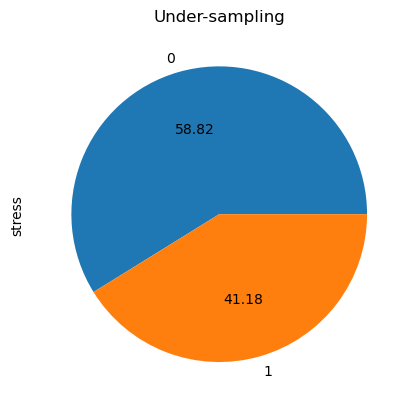

In [8]:
# Balacing data using UnderSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(sampling_strategy=0.7) 

X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [9]:
y_res.value_counts()

0    8177
1    5724
Name: stress, dtype: int64

In [10]:
# Split data into train and teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)

## Machine Learning - Cold

In [11]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [05:18<00:00, 10.98s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.73,0.71,0.71,0.72,2.77
NuSVC,0.71,0.70,0.70,0.71,64.32
ExtraTreesClassifier,0.72,0.69,0.69,0.71,7.24
SVC,0.71,0.69,0.69,0.71,47.96
RandomForestClassifier,0.72,0.69,0.69,0.71,24.68
XGBClassifier,0.70,0.68,0.68,0.70,16.64
AdaBoostClassifier,0.69,0.67,0.67,0.69,23.36
BaggingClassifier,0.70,0.67,0.67,0.69,33.86
SGDClassifier,0.67,0.66,0.66,0.67,1.00
